## **Implementation**
---

In [1]:
#Import Required Libraries

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.applications.xception import Xception, preprocess_input
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Perform Data Augmentation

datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False,
                             rescale=1/255.0, 
                             validation_split=0.2)

In [4]:
#Making instance of Xception without taking its top layer and also making other layers non-trainable
xception_wo_top = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=(71,71,3), pooling=None)

83683744/83683744 [==============================] - 0s 0us/step


In [5]:
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(71,71),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [6]:
valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(71,71),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [7]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [8]:
# Defining the architecture of the model

model = Sequential()
model.add(xception_wo_top)
model.add(GlobalAveragePooling2D(input_shape=(7,7,2048)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(trainDatagen,
                   epochs =5,
                   validation_data = valDatagen,
                   callbacks=[early_stop])

Epoch 1/5
1378/1378 [==============================] - 109s 79ms/step - loss: 0.0992 - accuracy: 0.9663 - val_loss: 0.1169 - val_accuracy: 0.9570
Epoch 2/5
1378/1378 [==============================] - 107s 78ms/step - loss: 0.0907 - accuracy: 0.9696 - val_loss: 0.1275 - val_accuracy: 0.9555
Epoch 3/5
1378/1378 [==============================] - 111s 81ms/step - loss: 0.0893 - accuracy: 0.9699 - val_loss: 0.1428 - val_accuracy: 0.9499
Epoch 4/5
1378/1378 [==============================] - 110s 80ms/step - loss: 0.0850 - accuracy: 0.9713 - val_loss: 0.1940 - val_accuracy: 0.9085
Epoch 5/5
1378/1378 [==============================] - 108s 78ms/step - loss: 0.0793 - accuracy: 0.9718 - val_loss: 0.1458 - val_accuracy: 0.9530


In [15]:
#PLot the learning curves

def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

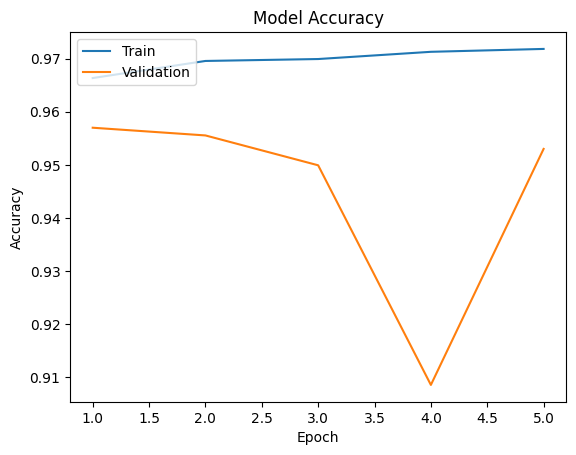

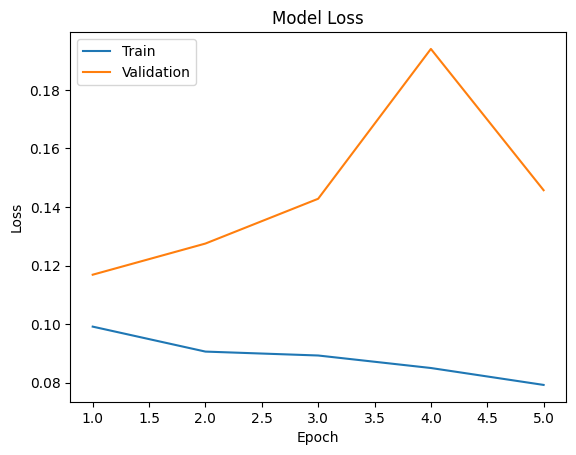

In [17]:
plotLearningCurve(history, 5)
